# Dimensionality Reduction Movies Dataset
- Héctor Fernando Ricárdez Lara
- Arturo Avelar Chairez

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from sklearn.neighbors import KNeighborsClassifier as KNN


from scipy.cluster import hierarchy



In [3]:
movies_df_col_names = ['client_id', 'movie_id', 'score', 'evaluation_id']
movies_df = pd.read_csv('Peliculas_Clientes.txt', names=movies_df_col_names, sep='\t')
movies_df

,client_id,movie_id,score,evaluation_id
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


# Filter movies and users

In [4]:
movie_id_counts = movies_df['movie_id'].value_counts()
movie_id_counts_sorted = movie_id_counts.sort_values(ascending=False).head(50)
movie_id_sorted_index = movie_id_counts_sorted.index

client_id_counts = movies_df['client_id'].value_counts()
client_id_counts_sorted = client_id_counts.sort_values(ascending=False).head(100)
client_id_sorted_index = client_id_counts_sorted.index

#intersect_id_index = movie_id_sorted_index.intersection(client_id_sorted_index)

movies_df = movies_df[movies_df['movie_id'].isin(movie_id_sorted_index) & movies_df['client_id'].isin(client_id_sorted_index)]
movies_df

,client_id,movie_id,score,evaluation_id
23,291,118,2,874833878
24,308,1,4,887736532
31,301,98,4,882075827
164,90,98,5,891383204
185,13,98,4,881515011
...,...,...,...,...
99934,788,328,4,880867477
99942,363,181,5,891494783
99951,130,121,5,876250746
99982,279,64,1,875308510


In [5]:
movies_des_df_col_names = ['Unknown' + str(i) for i in range(24)]
movies_des_df_col_names[0] = 'movie_id'
movies_des_df_col_names[1] = 'movie_name'
movies_des_df = pd.read_csv('Peliculas_descripcion.txt', names=movies_des_df_col_names, sep='|')
movies_des_df = movies_des_df.drop(columns=['Unknown' + str(i) for i in range(2, 24)])
movies_des_df

,movie_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [6]:
movies_df = movies_df.merge(movies_des_df[['movie_name', 'movie_id']], on='movie_id', how='left')
movies_df

,client_id,movie_id,score,evaluation_id,movie_name
0,291,118,2,874833878,Twister (1996)
1,308,1,4,887736532,Toy Story (1995)
2,301,98,4,882075827,"Silence of the Lambs, The (1991)"
3,90,98,5,891383204,"Silence of the Lambs, The (1991)"
4,13,98,4,881515011,"Silence of the Lambs, The (1991)"
...,...,...,...,...,...
3803,788,328,4,880867477,Conspiracy Theory (1997)
3804,363,181,5,891494783,Return of the Jedi (1983)
3805,130,121,5,876250746,Independence Day (ID4) (1996)
3806,279,64,1,875308510,"Shawshank Redemption, The (1994)"


In [7]:
# clients_des_df_col_names = ['Unknown' + str(i) for i in range(5)]
# clients_des_df_col_names[0] = 'client_id'
# clients_des_df_col_names[1] = 'age'
# clients_des_df_col_names[2] = 'sex'
# clients_des_df_col_names[3] = 'client_type'
# clients_des_df = pd.read_csv('/content/drive/MyDrive/Sexto Semestre/Machnine Learning I/GeneralDatasets/Peliculas/Clientes_descripcion.txt', names=clients_des_df_col_names, sep='|')
# clients_des_df

In [8]:
# movies_df = movies_df.merge(clients_des_df[['client_type', 'client_id']], on='client_id', how='left')


In [9]:
movie_ids = np.unique(movies_df['movie_id'])
client_ids = np.unique(movies_df['client_id'])
# Got names this way because of some inconsistencies with the numpy unique for names
movie_names = [ movies_df[movies_df['movie_id'] == movie_id_val].iloc[0]['movie_name'] for movie_id_val in movie_ids]
movie_client_score_df = pd.DataFrame(columns=client_ids, index=movie_names)
# Set default score values as 3 for the non existant evaluations
for col in movie_client_score_df:
  movie_client_score_df[col] = '-'

for index, row in movies_df.iterrows():
  movie_client_score_df[row['client_id']][row['movie_name']] = row['score']
movie_client_score_df

,1,7,13,18,59,85,90,92,94,95,...,870,880,881,883,886,889,894,896,916,932
Toy Story (1995),5,-,3,5,2,-,-,4,4,5,...,5,4,4,3,4,3,4,4,4,4
Twelve Monkeys (1995),4,5,2,-,4,-,-,4,4,5,...,4,3,4,5,5,3,4,4,4,4
Dead Man Walking (1995),5,5,3,5,4,4,4,4,5,-,...,5,-,3,4,5,4,4,4,5,5
Mr. Holland's Opus (1995),5,-,-,4,5,-,-,3,-,4,...,-,-,3,-,3,-,3,3,-,-
Braveheart (1995),4,5,4,5,4,-,4,3,4,4,...,4,4,5,3,4,3,-,5,4,-
"Birdcage, The (1996)",4,3,1,3,4,2,5,3,3,3,...,-,4,3,-,-,-,2,3,-,-
Apollo 13 (1995),4,5,5,3,5,4,-,3,4,4,...,4,5,5,3,4,4,-,2,4,-
Star Wars (1977),5,5,5,4,5,5,-,5,5,5,...,3,5,3,4,5,4,4,5,5,-
Pulp Fiction (1994),4,5,5,5,5,4,5,5,5,-,...,5,5,1,5,4,5,-,-,5,4
"Shawshank Redemption, The (1994)",5,5,5,5,5,5,4,4,5,5,...,5,5,5,4,5,5,-,4,5,2


# PCA

In [10]:
movie_client_score_df_pca = movie_client_score_df.copy().replace('-', 3)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(movie_client_score_df_pca)

pca_md = PCA(n_components=2)
pca_md.fit(X_scaled)
XT = pca_md.transform(X_scaled)

pca_df = pd.DataFrame(data=XT, columns=['pc1', 'pc2'], index=movie_names)

print(movie_client_score_df_pca.shape)
print(XT.shape)

(50, 100)
(50, 2)


In [11]:
exp_var = np.round(pca_md.explained_variance_ratio_, 2)
cexp_var = np.round(np.cumsum(pca_md.explained_variance_ratio_), 2)

for i in range(len(exp_var)):
  print(exp_var[i], cexp_var[i])

0.19 0.19
0.09 0.28


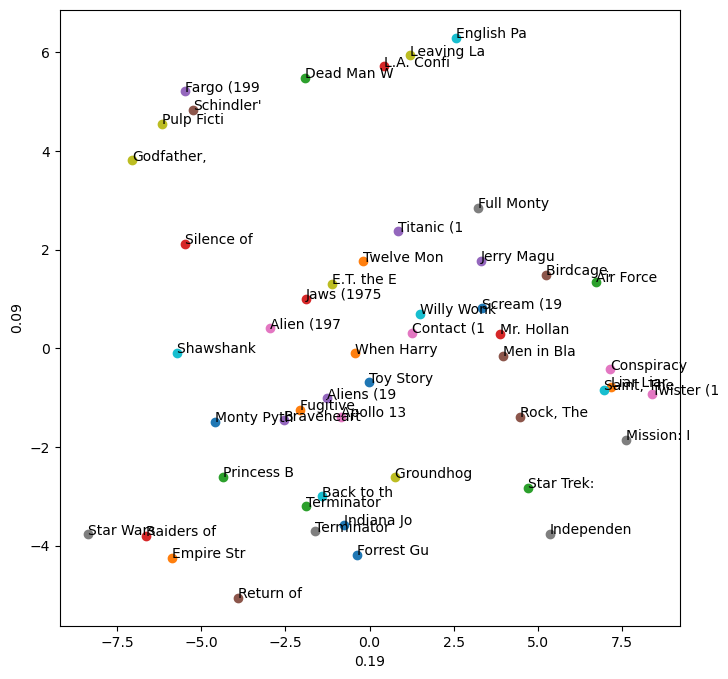

In [12]:
colors = ['firebrick','sienna','gold','seagreen','deepskyblue']

plt.figure(figsize=(8,8))

for movie in pca_df.index:
  plt.scatter(pca_df.loc[movie]['pc1'], pca_df.loc[movie]['pc2'])
  plt.text(pca_df.loc[movie]['pc1'], pca_df.loc[movie]['pc2'], movie[:10])

plt.xlabel(str(exp_var[0]))
plt.ylabel(str(exp_var[1]))

plt.show()

# MDS

In [13]:
mat_len = len(movie_client_score_df.index)
distancias = pd.DataFrame(columns = movie_client_score_df.index, index = movie_client_score_df.index, data = np.zeros((mat_len, mat_len)))
for idx, row in movie_client_score_df.iterrows():
  for jdx, row2 in movie_client_score_df.iterrows():
    dst = 0
    cnt =0
    for c in movie_client_score_df.columns:
      if row[c]=='-' or row2[c]=='-':
          continue;
      dst += abs(row[c]-row2[c])
      cnt += 1
    dst /= cnt
    distancias[idx][jdx] = dst
    
distancias

,Toy Story (1995),Twelve Monkeys (1995),Dead Man Walking (1995),Mr. Holland's Opus (1995),Braveheart (1995),"Birdcage, The (1996)",Apollo 13 (1995),Star Wars (1977),Pulp Fiction (1994),"Shawshank Redemption, The (1994)",...,Scream (1996),Liar Liar (1997),Air Force One (1997),L.A. Confidential (1997),Titanic (1997),Schindler's List (1993),Conspiracy Theory (1997),Mission: Impossible (1996),E.T. the Extra-Terrestrial (1982),"Saint, The (1997)"
Toy Story (1995),0.000000,0.757143,0.775862,0.870370,0.750000,0.967742,0.842857,0.948052,1.013158,0.735294,...,0.872727,0.877193,0.815789,1.108108,0.794872,0.866667,0.928571,0.970588,0.887324,1.052632
Twelve Monkeys (1995),0.757143,0.000000,0.666667,0.869565,0.857143,1.050000,0.940299,0.933333,0.920000,0.909091,...,0.881356,1.125000,0.972222,0.744186,0.800000,0.949153,1.048780,1.086957,0.925373,1.333333
Dead Man Walking (1995),0.775862,0.666667,0.000000,0.911111,0.816667,1.183673,1.000000,0.950820,0.841270,0.724138,...,1.046512,1.186047,1.060606,0.885714,0.805556,0.596491,1.111111,1.345455,0.947368,1.428571
Mr. Holland's Opus (1995),0.870370,0.869565,0.911111,0.000000,0.940000,0.829787,0.820000,1.178571,1.056604,0.923077,...,0.820513,0.925000,0.857143,1.153846,0.965517,1.000000,1.129032,1.183673,0.981132,1.035714
Braveheart (1995),0.750000,0.857143,0.816667,0.940000,0.000000,1.293103,0.671233,0.886076,1.075000,0.657534,...,0.892857,1.192982,1.105263,1.025000,0.744186,0.727273,1.023256,1.147059,0.878378,1.131579
"Birdcage, The (1996)",0.967742,1.050000,1.183673,0.829787,1.293103,0.000000,1.116667,1.402985,1.212121,1.379310,...,0.923077,1.098039,1.026316,1.371429,1.323529,1.490196,1.184211,0.862069,0.936508,1.241379
Apollo 13 (1995),0.842857,0.940299,1.000000,0.820000,0.671233,1.116667,0.000000,0.926829,1.012346,0.712329,...,0.847458,1.152542,0.714286,0.775000,0.675000,0.925373,0.931818,0.895522,0.894737,1.051282
Star Wars (1977),0.948052,0.933333,0.950820,1.178571,0.886076,1.402985,0.926829,0.000000,0.888889,0.584416,...,1.218750,1.507937,1.477273,0.533333,0.533333,0.732394,1.413043,1.407895,0.857143,1.395349
Pulp Fiction (1994),1.013158,0.920000,0.841270,1.056604,1.075000,1.212121,1.012346,0.888889,0.000000,0.797468,...,1.174603,1.437500,1.272727,0.733333,0.750000,0.888889,1.326087,1.440000,1.083333,1.309524
"Shawshank Redemption, The (1994)",0.735294,0.909091,0.724138,0.923077,0.657534,1.379310,0.712329,0.584416,0.797468,0.000000,...,1.076923,1.345455,1.225000,0.833333,0.550000,0.515152,1.279070,1.432836,0.816901,1.416667


In [14]:
model = MDS(n_components=2, dissimilarity='precomputed')
XT = model.fit_transform(distancias)
print(XT)

[[ 0.23268049 -0.03070338]
 [ 0.2223682   0.34628464]
 [ 0.22147407  0.6743121 ]
 [ 0.61688487  0.06197765]
 [ 0.34760193  0.42973049]
 [-0.1238889  -0.92968961]
 [ 0.36794475  0.17548987]
 [-0.59066592  0.37908263]
 [-0.64387338  0.59699732]
 [-0.15011537  0.55462118]
 [ 0.57011984  0.31797907]
 [-0.04955064 -0.01623747]
 [-0.00707817  0.13814237]
 [-0.25310841  0.45398201]
 [-0.13703525  0.76344091]
 [ 0.55804512 -0.31795013]
 [ 0.86157695 -0.69150753]
 [ 0.63704935 -0.49659367]
 [-0.33800295  0.79154431]
 [-0.70108591 -0.63828596]
 [ 0.08448686  0.63340178]
 [-0.46913397  0.20185254]
 [-0.72313764  0.23881718]
 [-0.31301898  0.21745071]
 [-0.40217798 -0.12643105]
 [-0.31149221  0.04540356]
 [-0.14950384  0.34639605]
 [-0.08324513 -0.17228888]
 [-0.22474854 -0.39000044]
 [ 0.10884064 -0.00523059]
 [ 0.16174031 -0.15255909]
 [-0.02901097 -0.33729799]
 [ 0.34182157 -0.57784529]
 [-0.66950209 -0.02345079]
 [-0.28735802 -0.60392609]
 [ 0.00471549 -0.56792953]
 [ 0.42485441  0.04641038]
 

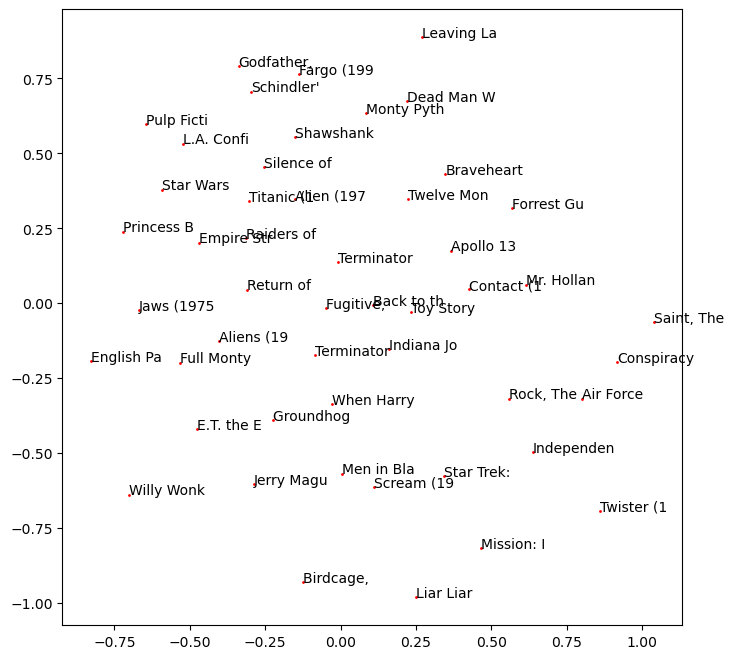

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(XT[:,0],XT[:,1],s=1,c='red')
for w,word in enumerate(distancias):
  plt.text(XT[w,0], XT[w,1], word[:10])
plt.show()

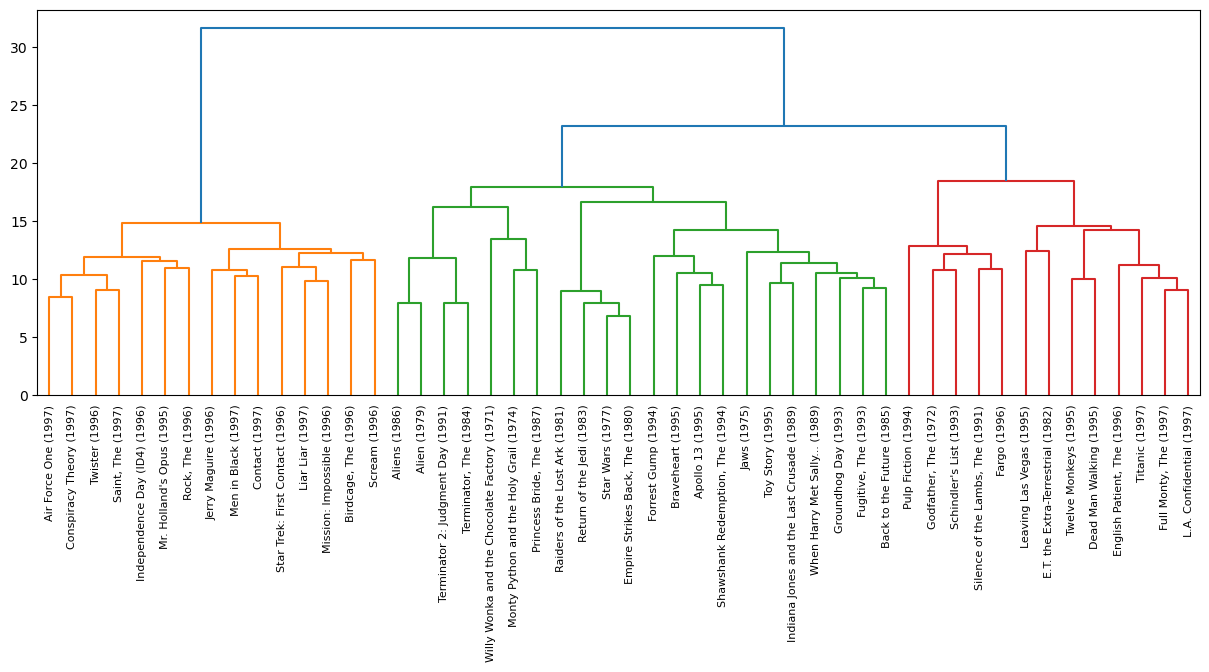

In [16]:
plt.figure(figsize=(15,5))
Z = hierarchy.linkage(movie_client_score_df_pca, method='ward')

dn = hierarchy.dendrogram(Z, labels=movie_client_score_df.index)

plt.show()

# Lista de películas e indices

In [17]:
movie_index_df = pd.DataFrame(movie_names, columns=['Movie name']).rename_axis('ID')

movie_index_df

,Movie name
ID,
0,Toy Story (1995)
1,Twelve Monkeys (1995)
2,Dead Man Walking (1995)
3,Mr. Holland's Opus (1995)
4,Braveheart (1995)
5,"Birdcage, The (1996)"
6,Apollo 13 (1995)
7,Star Wars (1977)
8,Pulp Fiction (1994)


# Escribe el indice de tus 5 peliculas favoritas separadas por espacios

In [18]:
favorites_movies_in = []

while True:
    try:
        # read input from user
        input_str = input("Enter the ID of your 5 favorite movies separated by spaces: ")
        
        # split the input string into a list of integers
        favorites_movies_in = list(map(int, input_str.split()))
        
        # check if the list has exactly 5 integers
        flag = False
        for i in favorites_movies_in:
            if i < 0 or i > 49:
                flag = True

        if flag:
            print("Invalid input. Please write valid IDs")
            continue
        
        if (len(favorites_movies_in)!=5):
            print("Invalid input. Please enter exactly 5 IDs.")
            continue

        break

        
    except ValueError:
        print("Invalid input. Please enter integers only separated by spaces.")

print("The input numbers are:", favorites_movies_in)

The input numbers are: [18, 17, 49, 1, 24]


In [19]:
def ClosestDistancePerEach(favorites, distFun, df):
    recomendations = []
    for i in favorites:
        fav = df.iloc[i,:]
        dst = 1e9
        best=0
        for j, (_, row) in enumerate(df.iterrows()):
            if j in favorites or j in recomendations:
                continue 
            my_dist = distFun(row, fav)
            if (my_dist < dst):
                dst = my_dist
                best = j
        recomendations.append(best)
    return recomendations


In [20]:
def Preprocess(A, B):
    # Find the indices of elements that are not dashes in both A and B
    valid_indices = [i for i in range(len(A)) if A[i] != '-' and B[i] != '-']

    # Create the new vectors A' and B' by taking only the elements with valid indices
    A_prime = [A[i] for i in valid_indices]
    B_prime = [B[i] for i in valid_indices]

    return np.array(A_prime), np.array(B_prime)

def angleDistance(a, b):
    va = a.values
    vb = b.values

    va,vb = Preprocess(va,vb)

    dot_product = np.dot(va, vb)
    magnitude_va = np.linalg.norm(va)
    magnitude_vb = np.linalg.norm(vb)   
    cos_angle = dot_product / (magnitude_va * magnitude_vb)
    return -cos_angle

def eulerDistance(a, b):
    va = a.values
    vb = b.values
    
    va,vb = Preprocess(va,vb)
    return np.linalg.norm(vb-va)  

def manhattanDistance(a, b):
    va = a.values
    vb = b.values
    
    va,vb = Preprocess(va,vb)
    return np.sum(np.abs(va-vb))



In [23]:
movies_norateishate_df = movie_client_score_df.copy().replace('-', 0)


In [24]:
recommendations = movie_client_score_df_pca.index[
    ClosestDistancePerEach(
        favorites_movies_in, eulerDistance, movies_norateishate_df
    )
]
print("F_ids:", favorites_movies_in)
print("Favorites", movie_client_score_df.index[favorites_movies_in])
print("Recommendations", recommendations)


F_ids: [18, 17, 49, 1, 24]
Favorites Index(['Godfather, The (1972)', 'Independence Day (ID4) (1996)',
       'Saint, The (1997)', 'Twelve Monkeys (1995)', 'Aliens (1986)'],
      dtype='object')
Recommendations Index(['Silence of the Lambs, The (1991)', 'Mission: Impossible (1996)',
       'Twister (1996)', 'Terminator, The (1984)', 'Alien (1979)'],
      dtype='object')


In [ ]:
movie_names

['Toy Story (1995)',
 'Twelve Monkeys (1995)',
 'Dead Man Walking (1995)',
 "Mr. Holland's Opus (1995)",
 'Braveheart (1995)',
 'Birdcage, The (1996)',
 'Apollo 13 (1995)',
 'Star Wars (1977)',
 'Pulp Fiction (1994)',
 'Shawshank Redemption, The (1994)',
 'Forrest Gump (1994)',
 'Fugitive, The (1993)',
 'Terminator 2: Judgment Day (1991)',
 'Silence of the Lambs, The (1991)',
 'Fargo (1996)',
 'Rock, The (1996)',
 'Twister (1996)',
 'Independence Day (ID4) (1996)',
 'Godfather, The (1972)',
 'Willy Wonka and the Chocolate Factory (1971)',
 'Monty Python and the Holy Grail (1974)',
 'Empire Strikes Back, The (1980)',
 'Princess Bride, The (1987)',
 'Raiders of the Lost Ark (1981)',
 'Aliens (1986)',
 'Return of the Jedi (1983)',
 'Alien (1979)',
 'Terminator, The (1984)',
 'Groundhog Day (1993)',
 'Back to the Future (1985)',
 'Indiana Jones and the Last Crusade (1989)',
 'When Harry Met Sally... (1989)',
 'Star Trek: First Contact (1996)',
 'Jaws (1975)',
 'Jerry Maguire (1996)',
 'Men